In [1]:
import tensorflow as tf

image = tf.io.read_file('Ganesh.jpg')

image = tf.io.decode_jpeg(image, channels=1)

image = tf.image.resize(image, size=[300, 300])

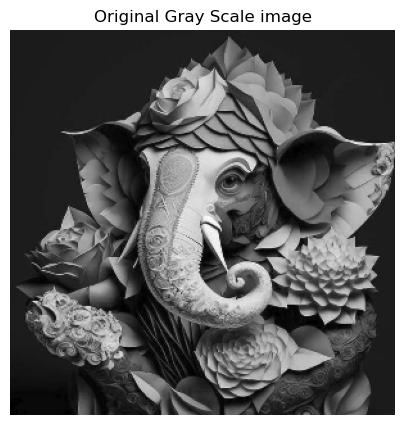

In [2]:
import matplotlib.pyplot as plt

img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

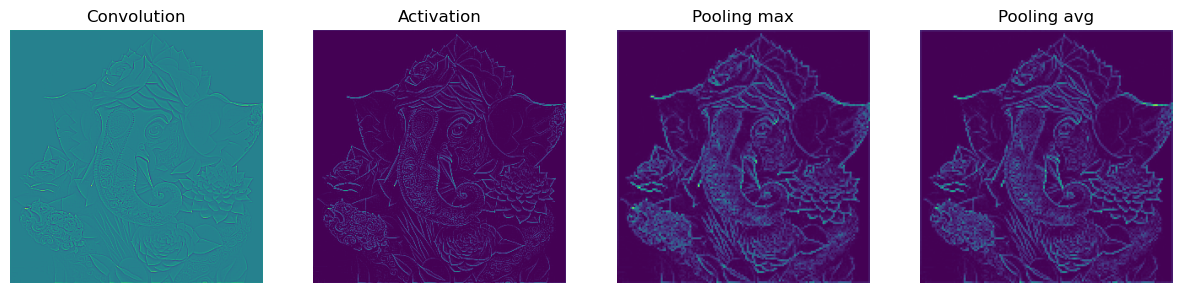

In [3]:
kernel = tf.constant([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1],
                    ])

image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

conv_fn = tf.nn.conv2d


image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)

img=tf.squeeze(image_filter)
plt.imshow(img)
plt.axis('off')
plt.title('Convolution')

relu_fn = tf.nn.relu

image_detect = relu_fn(image_filter)

plt.subplot(1, 4, 2)
img=tf.squeeze(image_detect)
plt.imshow(img)
plt.axis('off')
plt.title('Activation')


pool = tf.nn.pool
image_condense = pool(input=image_detect,
                        window_shape=(2, 2),
                        pooling_type='MAX',
                        strides=(2, 2),
                        padding='SAME',
                    )

plt.subplot(1, 4, 3)
img=tf.squeeze(image_condense)
plt.imshow(img)
plt.axis('off')
plt.title('Pooling max')

pool = tf.nn.pool
image_condense = pool(input=image_detect,
                        window_shape=(2, 2),
                        pooling_type='AVG',
                        strides=(2, 2),
                        padding='SAME',
                    )

plt.subplot(1, 4, 4)
img=tf.squeeze(image_condense)
plt.imshow(img)
plt.axis('off')
plt.title('Pooling avg')
plt.show()